In [19]:
%matplotlib inline
import matplotlib as plt

In [24]:
import tushare as ts
df = ts.get_hist_data('162411',start="20110929")

In [26]:
df.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20
date,,,,,,,,,,,,,
2019-06-04,0.45,0.46,0.45,0.45,1827518.50,0.00,0.00,0.460,0.478,0.494,2359972.20,1773194.40,1322531.34
2019-06-03,0.45,0.46,0.45,0.45,2416919.50,-0.01,-2.17,0.468,0.484,0.497,2275159.20,1654771.52,1268672.81
2019-05-31,0.46,0.46,0.46,0.46,3045387.75,-0.01,-2.13,0.476,0.491,0.499,1982134.15,1481366.92,1239267.24
2019-05-30,0.47,0.47,0.47,0.47,1089420.50,0.00,0.00,0.482,0.497,0.503,1761524.25,1360270.65,1109783.91
2019-05-29,0.47,0.47,0.47,0.47,3420614.75,-0.02,-4.08,0.488,0.501,0.505,1772055.05,1305156.75,1090644.42


In [17]:
df.close.mean()

0.5940722495894925

In [22]:
df.close.describe()

count    609.000000
mean       0.594072
std        0.074944
min        0.440000
25%        0.530000
50%        0.580000
75%        0.660000
max        0.770000
Name: close, dtype: float64

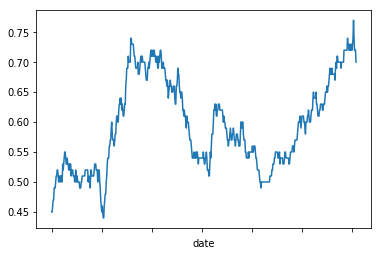

In [21]:
df.close.plot();

           净值日期   单位净值   累计净值  日增长率  申购状态  赎回状态 分红送配
0    2011-09-29  1.000  1.000   NaN   封闭期   封闭期  nan
1    2011-09-30  1.000  1.000  0.00   封闭期   封闭期  nan
2    2011-10-14  1.001  1.001  0.10   封闭期   封闭期  nan
3    2011-10-21  1.001  1.001  0.00   封闭期   封闭期  nan
4    2011-10-24  1.001  1.001  0.00   封闭期   封闭期  nan
5    2011-10-25  1.001  1.001  0.00  开放申购  开放赎回  nan
6    2011-10-26  1.004  1.004  0.30  开放申购  开放赎回  nan
7    2011-10-27  1.011  1.011  0.70  开放申购  开放赎回  nan
8    2011-10-28  1.012  1.012  0.10  开放申购  开放赎回  nan
9    2011-10-31  1.001  1.001 -1.09  开放申购  开放赎回  nan
10   2011-11-01  0.993  0.993 -0.80  开放申购  开放赎回  nan
11   2011-11-02  1.001  1.001  0.81  开放申购  开放赎回  nan
12   2011-11-03  1.003  1.003  0.20  开放申购  开放赎回  nan
13   2011-11-04  1.005  1.005  0.20  开放申购  开放赎回  nan
14   2011-11-07  1.006  1.006  0.10  开放申购  开放赎回  nan
15   2011-11-08  1.009  1.009  0.30  开放申购  开放赎回  nan
16   2011-11-09  0.993  0.993 -1.59  开放申购  开放赎回  nan
17   2011-11-10  0.999  0.999  0.60  开放申购  开放赎

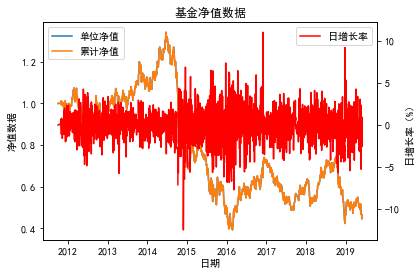

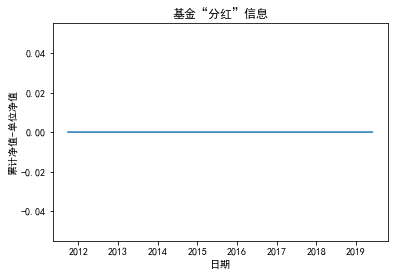

日增长率缺失： 7
日增长率为正的天数： 875
日增长率为负（包含0）的天数： 980


In [30]:
# 导入需要的模块
import requests
from bs4 import BeautifulSoup
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

#指定默认字体
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
#解决负号'-'显示为方块的问题
matplotlib.rcParams['axes.unicode_minus'] = False

# 抓取网页
def get_url(url, params=None, proxies=None):
    rsp = requests.get(url, params=params, proxies=proxies)
    rsp.raise_for_status()
    return rsp.text

# 从网页抓取数据
def get_fund_data(code,per=10,sdate='',edate='',proxies=None):
    url = 'http://fund.eastmoney.com/f10/F10DataApi.aspx'
    params = {'type': 'lsjz', 'code': code, 'page':1,'per': per, 'sdate': sdate, 'edate': edate}
    html = get_url(url, params, proxies)
    soup = BeautifulSoup(html, 'html.parser')

    # 获取总页数
    pattern=re.compile(r'pages:(.*),')
    result=re.search(pattern,html).group(1)
    pages=int(result)

    # 获取表头
    heads = []
    for head in soup.findAll("th"):
        heads.append(head.contents[0])

    # 数据存取列表
    records = []

    # 从第1页开始抓取所有页面数据
    page=1
    while page<=pages:
        params = {'type': 'lsjz', 'code': code, 'page':page,'per': per, 'sdate': sdate, 'edate': edate}
        html = get_url(url, params, proxies)
        soup = BeautifulSoup(html, 'html.parser')

        # 获取数据
        for row in soup.findAll("tbody")[0].findAll("tr"):
            row_records = []
            for record in row.findAll('td'):
                val = record.contents

                # 处理空值
                if val == []:
                    row_records.append(np.nan)
                else:
                    row_records.append(val[0])

            # 记录数据
            records.append(row_records)

        # 下一页
        page=page+1

    # 数据整理到dataframe
    np_records = np.array(records)
    data= pd.DataFrame()
    for col,col_name in enumerate(heads):
        data[col_name] = np_records[:,col]

    return data


# 主程序
if __name__ == "__main__":
    data=get_fund_data('162411',per=49,sdate='2011-09-29',edate='2019-12-31')
    # 修改数据类型
    data['净值日期']=pd.to_datetime(data['净值日期'],format='%Y/%m/%d')
    data['单位净值']= data['单位净值'].astype(float)
    data['累计净值']=data['累计净值'].astype(float)
    data['日增长率']=data['日增长率'].str.strip('%').astype(float)
    # 按照日期升序排序并重建索引
    data=data.sort_values(by='净值日期',axis=0,ascending=True).reset_index(drop=True)
    print(data)

    # 获取净值日期、单位净值、累计净值、日增长率等数据并
    net_value_date = data['净值日期']
    net_asset_value = data['单位净值']
    accumulative_net_value=data['累计净值']
    daily_growth_rate = data['日增长率']

    # 作基金净值图
    fig = plt.figure()
    #坐标轴1
    ax1 = fig.add_subplot(111)
    ax1.plot(net_value_date,net_asset_value)
    ax1.plot(net_value_date,accumulative_net_value)
    ax1.set_ylabel('净值数据')
    ax1.set_xlabel('日期')
    plt.legend(loc='upper left')
    #坐标轴2
    ax2 = ax1.twinx()
    ax2.plot(net_value_date,daily_growth_rate,'r')
    ax2.set_ylabel('日增长率（%）')
    plt.legend(loc='upper right')
    plt.title('基金净值数据')
    plt.show()

    # 绘制分红配送信息图
    bonus = accumulative_net_value-net_asset_value
    plt.figure()
    plt.plot(net_value_date,bonus)
    plt.xlabel('日期')
    plt.ylabel('累计净值-单位净值')
    plt.title('基金“分红”信息')
    plt.show()

    # 日增长率分析
    print('日增长率缺失：',sum(np.isnan(daily_growth_rate)))
    print('日增长率为正的天数：',sum(daily_growth_rate>0))
    print('日增长率为负（包含0）的天数：',sum(daily_growth_rate<=0))

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1862 entries, 0 to 1861
Data columns (total 7 columns):
净值日期    1862 non-null datetime64[ns]
单位净值    1862 non-null float64
累计净值    1862 non-null float64
日增长率    1855 non-null float64
申购状态    1862 non-null object
赎回状态    1862 non-null object
分红送配    1862 non-null object
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 101.9+ KB


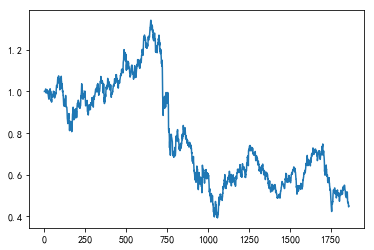

In [33]:
data["单位净值"].plot()

In [44]:
data["单位净值"].mean()

0.7852545649838873

In [48]:
data.to_excel("162411.xls")